## Title: Homework 4
#### Author: Trang Hoang 
#### Date: March 4th, 2024

## Set up environment and load data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gzip
import os 
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score


In [2]:
# get the current working directory
current_wd = os.getcwd()
file_path = f'{current_wd}'

# Load the test and train data directly, space-separated and there's no header
test_data = pd.read_csv(f'{file_path}/zip.test/zip.test', sep=' ', header=None)
train_data = pd.read_csv(f'{file_path}/zip.train/zip.train', sep=' ', header=None)

# Display the first few rows of the train data
train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,248,249,250,251,252,253,254,255,256,257
0,6.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-0.631,0.862,...,0.823,1.000,0.482,-0.474,-0.991,-1.000,-1.000,-1.000,-1.0,NaN
1,5.0,-1.0,-1.0,-1.0,-0.813,-0.671,-0.809,-0.887,-0.671,-0.853,...,-0.671,-0.033,0.761,0.762,0.126,-0.095,-0.671,-0.828,-1.0,NaN
2,4.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-0.109,1.000,-0.179,-1.000,-1.000,-1.000,-1.0,NaN
3,7.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.273,0.684,0.960,0.450,...,1.000,0.536,-0.987,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,NaN
4,3.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.928,-0.204,0.751,0.466,...,0.639,1.000,1.000,0.791,0.439,-0.199,-0.883,-1.000,-1.0,NaN


In [3]:
test_data.head()

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
0,9,-1.0,-1.0,-1.0,-1.000,-1.0,-0.948,-0.561,0.148,0.384,...,-1.000,-0.908,0.430,0.622,-0.973,-1.000,-1.0,-1.0,-1.0,-1.0
1,6,-1.0,-1.0,-1.0,-1.000,-1.0,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0
2,3,-1.0,-1.0,-1.0,-0.593,0.7,1.000,1.000,1.000,1.000,...,1.000,0.717,0.333,0.162,-0.393,-1.000,-1.0,-1.0,-1.0,-1.0
3,6,-1.0,-1.0,-1.0,-1.000,-1.0,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0
4,6,-1.0,-1.0,-1.0,-1.000,-1.0,-1.000,-1.000,-0.858,-0.106,...,0.901,0.901,0.901,0.290,-0.369,-0.867,-1.0,-1.0,-1.0,-1.0


## Data Cleaning 
I notice that for train_data, the column "257" has a lot of N/A value. If the entire column has N/A values, I would want to drop that column. Additionally, dropping that columns also mean that the test data and train data has the same number of features. 


In [4]:
# Drop columns 257 from the train data 
train_data = train_data.drop(columns=[257])
train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
0,6.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-0.631,0.862,...,0.304,0.823,1.000,0.482,-0.474,-0.991,-1.000,-1.000,-1.000,-1.0
1,5.0,-1.0,-1.0,-1.0,-0.813,-0.671,-0.809,-0.887,-0.671,-0.853,...,-0.671,-0.671,-0.033,0.761,0.762,0.126,-0.095,-0.671,-0.828,-1.0
2,4.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-0.109,1.000,-0.179,-1.000,-1.000,-1.000,-1.0
3,7.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.273,0.684,0.960,0.450,...,-0.318,1.000,0.536,-0.987,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
4,3.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.928,-0.204,0.751,0.466,...,0.466,0.639,1.000,1.000,0.791,0.439,-0.199,-0.883,-1.000,-1.0


## Data Display 

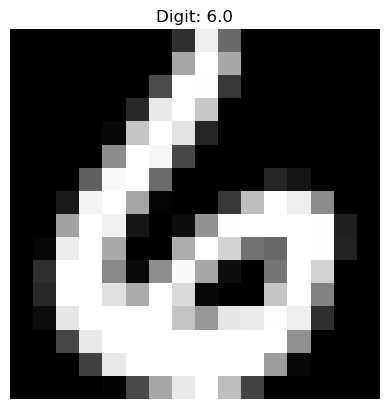

In [5]:
# Function to display a digit image
def display_digit(row):
    # Extract the image data (excluding the digit label at the start)
    image_data = row[1:].values.reshape(16,16)
    plt.imshow(image_data, cmap='gray')
    plt.axis('off') # Hide the axis
    plt.title(f"Digit: {row[0]}")
    plt.show()

# Display the image of the first digit in the train data
display_digit(train_data.iloc[0])


### Tasks: 
1) Implement the Nadaraya-Watson method with the k-NN kernel function, or any other function that implements the k-NN method. 
For simplicity and efficiency, we'll use the k-Nearest Neighbors (k-NN) classifier from scikit-learn, which effectively serves our purpose, as the Nadaraya-Watson method with a k-NN kernel can be conceptually similar to applying k-NN for classification
2) 2)  Using the zero-one loss function and 5-fold cross validation, estimate the average test error as a function of the tuning parameter 'k' - the number of nearest neighbors - ranging the value of k from 1 to 20.

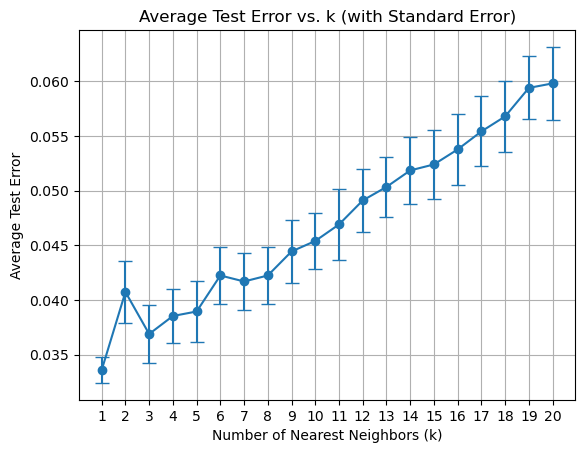

In [6]:


# Assuming 'data' is already loaded and contains the training data
# Separate the features and labels
X = train_data.iloc[:, 1:257].values  # Extracting the 256 grayscale values
y = train_data.iloc[:, 0].values      # Extracting the digit labels

# Initialize variables to store the results
k_values= range(1, 21)
average_test_errors = []
std_errors = []

# Perform 5-fold cross-validation for each 'k'
for k in k_values:
    # Initialize the k-NN classifier with the current 'k'
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Perform 5-fold cross-validation and compute the zero-one loss (error)
    # Note: 'cross_val_score' by default returns the accuracy, so we subtract from 1 to get the error
    scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
    error = 1 - scores
    
    # Compute the average test error and its standard error
    average_test_error = np.mean(error)
    std_error = np.std(error) / np.sqrt(len(error))  # Standard error of the mean
    
    # Store the results
    average_test_errors.append(average_test_error)
    std_errors.append(std_error)

# Plot the estimated average test error as a function of 'k'
plt.errorbar(k_values, average_test_errors, yerr=std_errors, fmt='-o', capsize=5)
plt.xlabel('Number of Nearest Neighbors (k)')
plt.ylabel('Average Test Error')
plt.title('Average Test Error vs. k (with Standard Error)')
plt.xticks(k_values)
plt.grid(True)
plt.show()


4)  Apply the one-standard error rule to select a final value for 'k'. 
Apply the One-Standard Error Rule: After estimating the average test error and its standard error for each value of 'k', identify the smallest value of 'k' for which the test error is within one standard error of the lowest test error. This 'k' will be used for the final model.

In [7]:
min_error = min(average_test_errors)
min_error_std = std_errors[average_test_errors.index(min_error)]

# Identify the smallest 'k' within one standard error of the minimum error
candidates = [k for k, error in enumerate(average_test_errors, 1)
               if error <= min_error + min_error_std]
k_final = min(candidates)
print('Selected K:', k_final)


Selected K: 1


5) Fit a final k-NN model using the full training data set and using the selected value for 'k'. 
Use the entire training dataset and the selected 'k' to fit the k-NN model.

In [8]:
# Fit the final model using the selected 'k'
knn_final = KNeighborsClassifier(n_neighbors=k_final)
knn_final.fit(X, y)  


KNeighborsClassifier(n_neighbors=1)

6)  Using the test data set, compute a confusion matrix and an estimate of conditional test error (using the zero-one loss). 

After fitting the model with the training data, predict the labels for the test dataset. Then, compute the confusion matrix to evaluate the model's performance and calculate the zero-one loss for an estimate of the conditional test error.

Confusion Matrix:
 [[355   0   2   0   0   0   0   1   0   1]
 [  0 255   0   0   6   0   2   1   0   0]
 [  6   1 183   2   1   0   0   2   3   0]
 [  3   0   2 154   0   5   0   0   0   2]
 [  0   3   1   0 182   1   2   2   1   8]
 [  2   1   2   4   0 145   2   0   3   1]
 [  0   0   1   0   2   3 164   0   0   0]
 [  0   1   1   1   4   0   0 139   0   1]
 [  5   0   1   6   1   1   0   1 148   3]
 [  0   0   1   0   2   0   0   4   1 169]]
Confusion Matrix plot


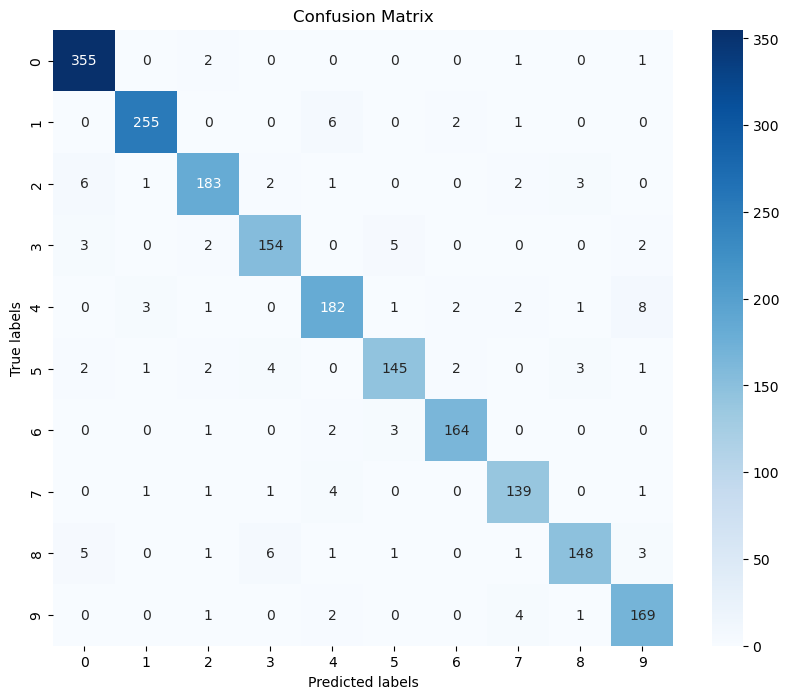

Conditional Test Error (Zero-One Loss): 0.05630293971101141


In [9]:
# Extracting x and y for the test data
X_test = test_data.iloc[:, 1:257].values  
y_test = test_data.iloc[:, 0].values    

# Predict the labels for the test data
y_pred = knn_final.predict(X_test)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
# Plot the confusion matrix
print("Confusion Matrix plot")

# Assuming 'conf_matrix' is the confusion matrix computed earlier
fig, ax = plt.subplots(figsize=(10, 8))  # Adjust the size as needed
sns.heatmap(conf_matrix, annot=True, ax=ax, cmap='Blues', fmt='g')

# Labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(range(10))  # Assuming digit labels 0-9
ax.yaxis.set_ticklabels(range(10))
plt.show()

# Calculate the zero-one loss (1 - accuracy)
test_error = 1 - accuracy_score(y_test, y_pred)
print("Conditional Test Error (Zero-One Loss):", test_error)

